In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from folium.plugins import HeatMap


%matplotlib inline


In [2]:

file_path = 'Dataset.csv'  
data = pd.read_csv(file_path)


print(data.info())
print(data.head())


missing_values = data.isnull().sum()
print("Missing values:\n", missing_values)


data = data.dropna(subset=['Latitude', 'Longitude'])


data['Average Cost for two'] = pd.to_numeric(data['Average Cost for two'], errors='coerce')
data['Aggregate rating'] = pd.to_numeric(data['Aggregate rating'], errors='coerce')
data['Votes'] = pd.to_numeric(data['Votes'], errors='coerce')


data.fillna({'Cuisines': 'Unknown', 'Aggregate rating': 0}, inplace=True)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

<Figure size 1500x1000 with 0 Axes>

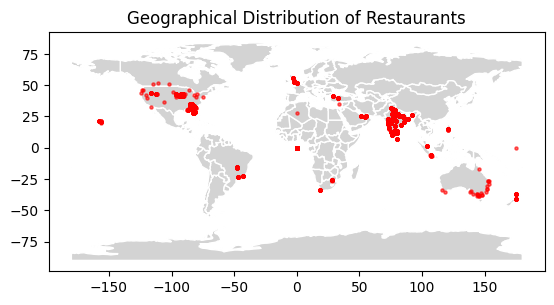

In [3]:
import geopandas as gpd
from shapely.geometry import Point
import matplotlib.pyplot as plt


world = gpd.read_file('natural_earth/ne_110m_admin_0_countries.shp')


geometry = [Point(xy) for xy in zip(data['Longitude'], data['Latitude'])]
geo_df = gpd.GeoDataFrame(data, geometry=geometry)


plt.figure(figsize=(15, 10))
base = world.plot(color='lightgrey', edgecolor='white')
geo_df.plot(ax=base, marker='o', color='red', markersize=5, alpha=0.6)

plt.title("Geographical Distribution of Restaurants")
plt.show()


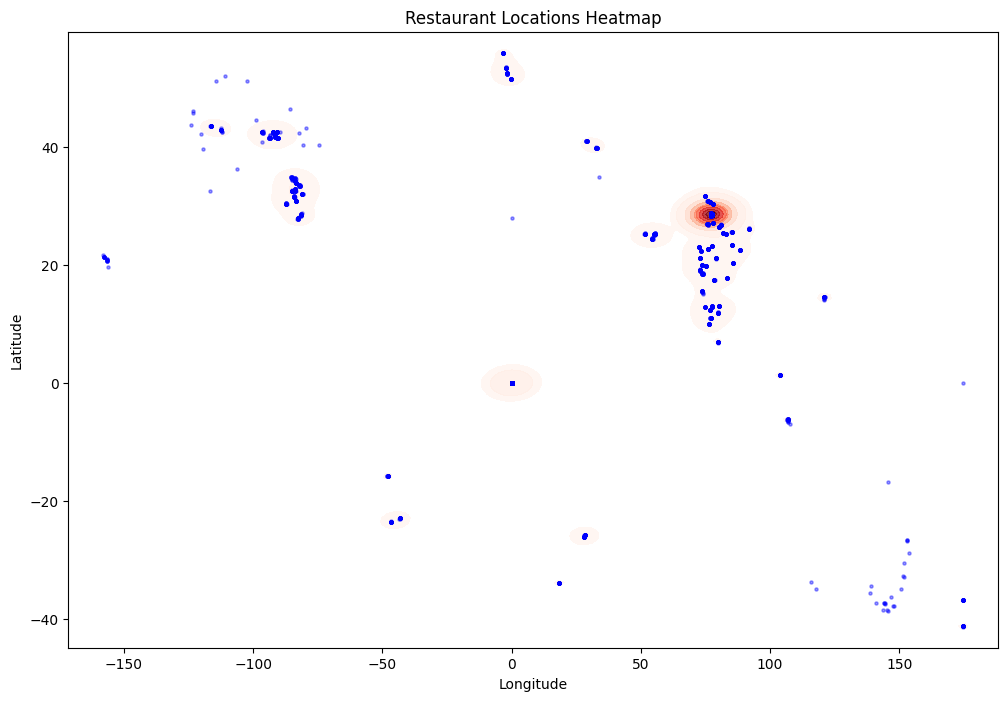

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt


heatmap_data = data[['Latitude', 'Longitude']].dropna()


plt.figure(figsize=(12, 8))
sns.kdeplot(
    x=heatmap_data['Longitude'],
    y=heatmap_data['Latitude'],
    cmap="Reds",
    fill=True,
    bw_adjust=0.5,
    alpha=0.8
)
plt.scatter(heatmap_data['Longitude'], heatmap_data['Latitude'], c='blue', s=5, alpha=0.4)
plt.title("Restaurant Locations Heatmap")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()


Top 10 cities with most restaurants:
 City
New Delhi       5473
Gurgaon         1118
Noida           1080
Faridabad        251
Ghaziabad         25
Bhubaneshwar      21
Lucknow           21
Guwahati          21
Ahmedabad         21
Amritsar          21
Name: Restaurant ID, dtype: int64


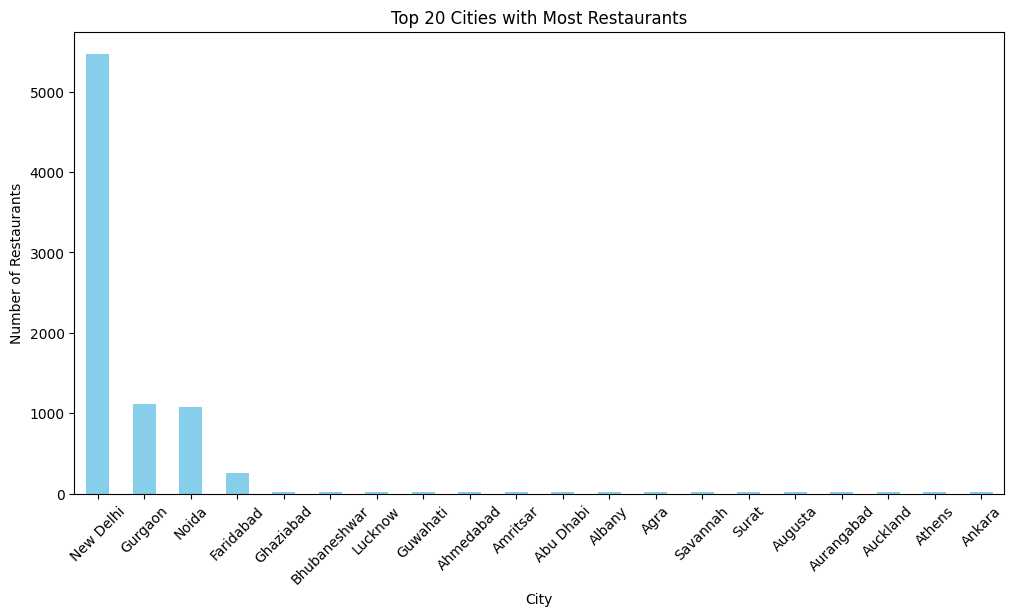

In [5]:

city_group = data.groupby('City')['Restaurant ID'].count().sort_values(ascending=False)
print("Top 10 cities with most restaurants:\n", city_group.head(10))


plt.figure(figsize=(12, 6))
city_group.head(20).plot(kind='bar', color='skyblue')
plt.title("Top 20 Cities with Most Restaurants")
plt.xlabel("City")
plt.ylabel("Number of Restaurants")
plt.xticks(rotation=45)
plt.show()


Average ratings by city:
 City
Inner City          4.900000
Quezon City         4.800000
Makati City         4.650000
Pasig City          4.633333
Mandaluyong City    4.625000
Beechworth          4.600000
London              4.535000
Taguig City         4.525000
Secunderabad        4.500000
Lincoln             4.500000
Name: Aggregate rating, dtype: float64


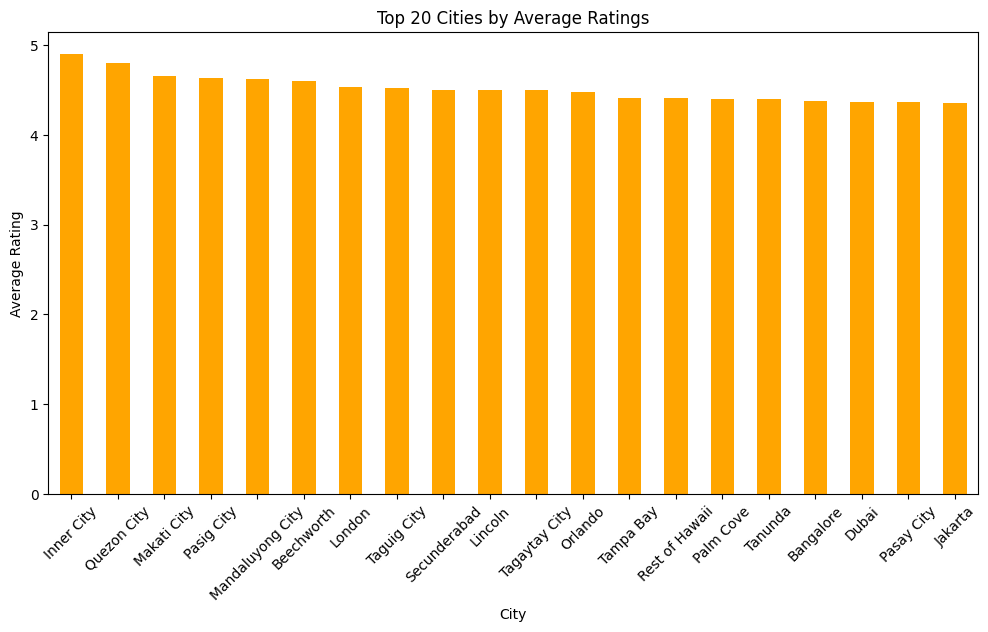

In [6]:
avg_ratings = data.groupby('City')['Aggregate rating'].mean().sort_values(ascending=False)
print("Average ratings by city:\n", avg_ratings.head(10))


plt.figure(figsize=(12, 6))
avg_ratings.head(20).plot(kind='bar', color='orange')
plt.title("Top 20 Cities by Average Ratings")
plt.xlabel("City")
plt.ylabel("Average Rating")
plt.xticks(rotation=45)
plt.show()


Most popular cuisines:
 Cuisines
North Indian    3960
Chinese         2735
Fast Food       1986
Mughlai          995
Italian          764
Bakery           745
Continental      736
Cafe             703
Desserts         653
South Indian     636
Name: count, dtype: int64


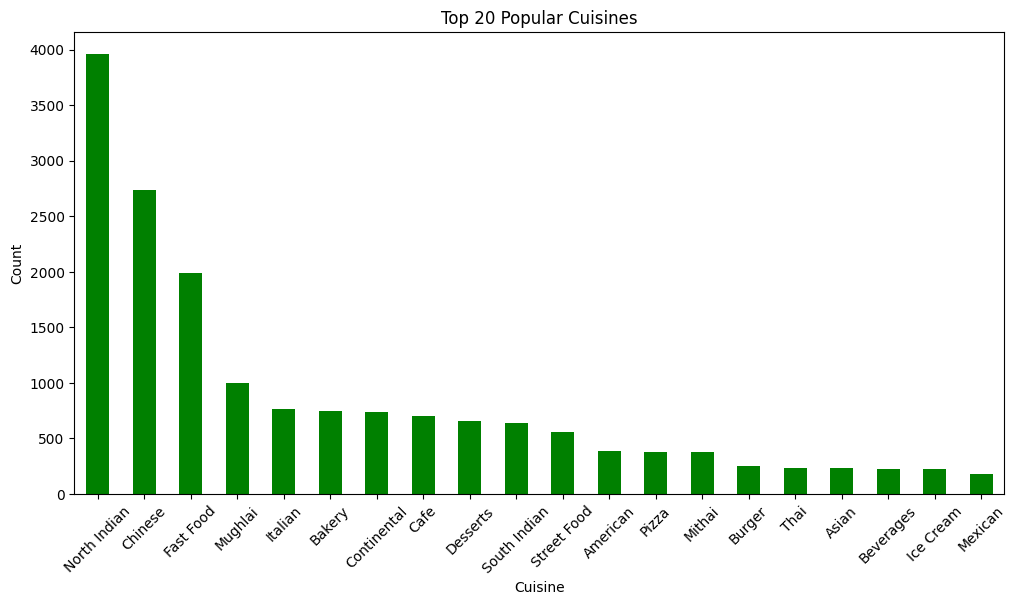

In [7]:

popular_cuisines = data.groupby('City')['Cuisines'].apply(lambda x: ', '.join(x)).str.split(', ').explode().value_counts()
print("Most popular cuisines:\n", popular_cuisines.head(10))


plt.figure(figsize=(12, 6))
popular_cuisines.head(20).plot(kind='bar', color='green')
plt.title("Top 20 Popular Cuisines")
plt.xlabel("Cuisine")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()


Average price range by city:
 City
Panchkula           4.000000
Vineland Station    4.000000
Paynesville         4.000000
Johannesburg        4.000000
Inner City          4.000000
Pasay City          4.000000
Princeton           4.000000
Sandton             3.818182
Mandaluyong City    3.750000
Pretoria            3.700000
Name: Price range, dtype: float64


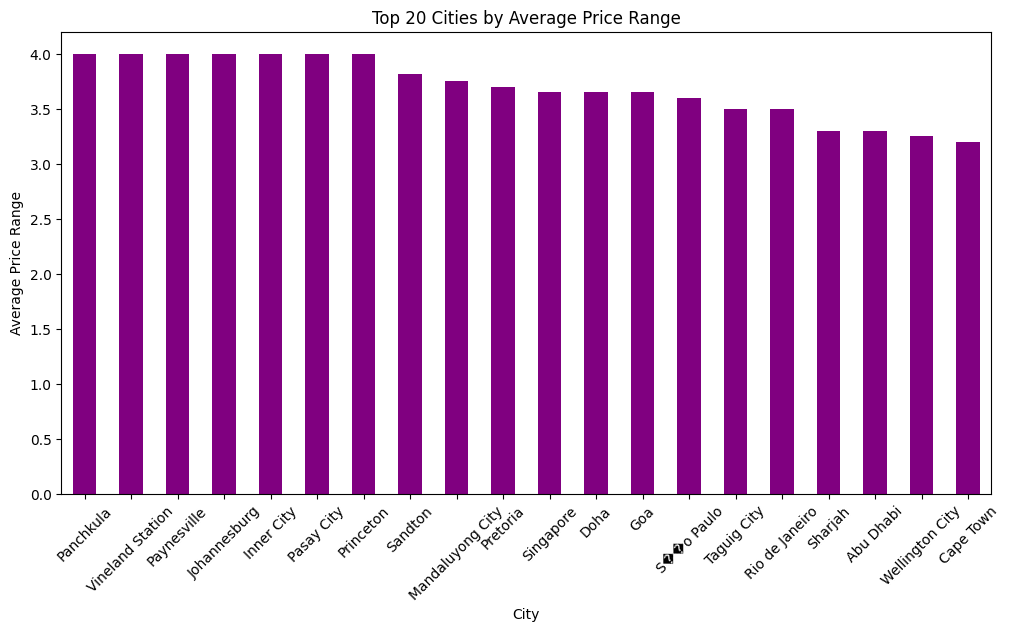

In [8]:
price_range = data.groupby('City')['Price range'].mean().sort_values(ascending=False)
print("Average price range by city:\n", price_range.head(10))


plt.figure(figsize=(12, 6))
price_range.head(20).plot(kind='bar', color='purple')
plt.title("Top 20 Cities by Average Price Range")
plt.xlabel("City")
plt.ylabel("Average Price Range")
plt.xticks(rotation=45)
plt.show()


Correlation between ratings and price range:
                   Aggregate rating  Price range
Aggregate rating          1.000000     0.437944
Price range               0.437944     1.000000


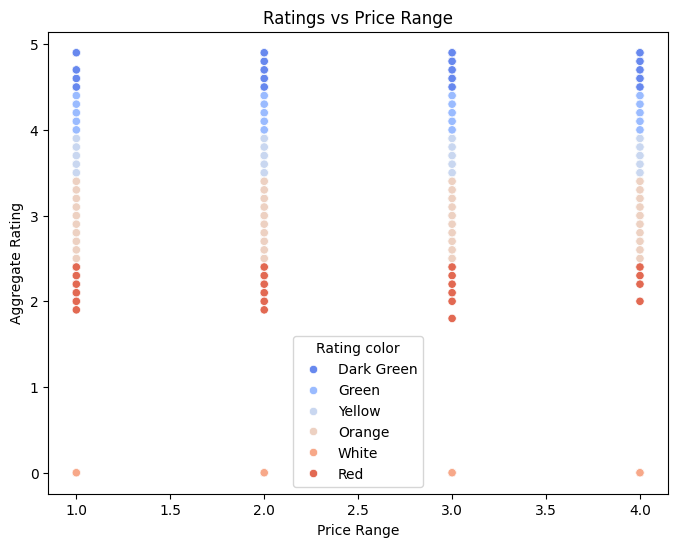

Online delivery availability:
 Has Online delivery
No     7100
Yes    2451
Name: count, dtype: int64


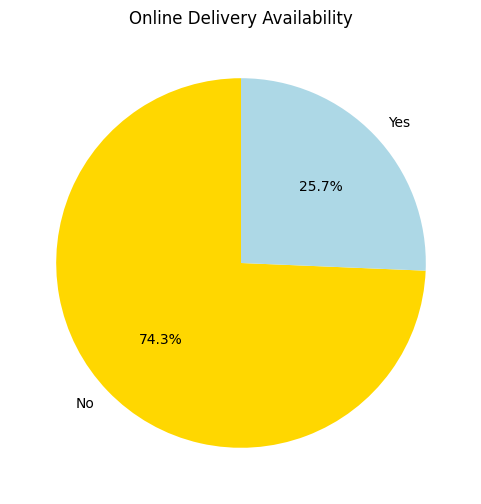

In [9]:

correlation = data[['Aggregate rating', 'Price range']].corr()
print("Correlation between ratings and price range:\n", correlation)


plt.figure(figsize=(8, 6))
sns.scatterplot(data=data, x='Price range', y='Aggregate rating', hue='Rating color', palette='coolwarm')
plt.title("Ratings vs Price Range")
plt.xlabel("Price Range")
plt.ylabel("Aggregate Rating")
plt.show()


online_delivery = data['Has Online delivery'].value_counts()
print("Online delivery availability:\n", online_delivery)


plt.figure(figsize=(6, 6))
online_delivery.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['gold', 'lightblue'])
plt.title("Online Delivery Availability")
plt.ylabel("")
plt.show()


In [10]:

summary = {
    'Top Cities': city_group.head(10),
    'Average Ratings': avg_ratings.head(10),
    'Popular Cuisines': popular_cuisines.head(10),
    'Price Ranges': price_range.head(10),
}
summary_df = pd.DataFrame.from_dict(summary, orient='index').transpose()
summary_df.to_csv('summary_insights.csv', index=False)
print("Summary insights saved as 'summary_insights.csv'")


Summary insights saved as 'summary_insights.csv'
